# Star Cluster Identifier Hackathon

In [106]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import itertools
from astropy import units as u
from astropy.coordinates import SkyCoord

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Processing Data

In [47]:
f = open("data/temp.txt", "w")

with open("data/Dataset.txt") as file:
    for line in file:
        if line[0] != '#':
            f.write(line)

f.close()

In [49]:
raw_df = pd.read_csv('data/temp.txt', header=None, delimiter=r"\s+")
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,6954.4673,1738.9973,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,0.9999,0.0085,1,1,-1.0,205.524050,28.341480,R0000001,1
1,7111.1323,1756.4988,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,0.9991,-0.0041,1,1,-1.0,205.522096,28.341672,R0000002,1
2,6884.0669,1784.6356,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,0.9997,-0.0023,1,1,-1.0,205.524928,28.341980,R0000003,1
3,6604.6484,1786.4238,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,1.0000,0.0086,1,1,-1.0,205.528412,28.342000,R0000004,1
4,7284.2275,1819.0413,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,1.0000,0.0000,99,99,-1.0,205.519938,28.342358,R0000005,1


In [61]:
cols = [0,1,2,8,14,20,26,32,33,34,35]
df = raw_df.iloc[:,cols]
df.columns = ['x', 'y', 'f275w', 'f336w', 'f438w', 'f606w', 'f814w', 'prob', 'ra', 'dec', 'id']
df.describe()

,x,y,f275w,f336w,f438w,f606w,f814w,prob,ra,dec
count,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000
mean,5062.955907,4916.888151,-20.770262,-8.363505,-8.390557,22.361134,21.434464,35.983431,205.547639,28.376351
std,1301.778070,1289.670308,59.867925,54.505959,54.276369,8.054891,7.722576,47.294623,0.016237,0.014153
min,2074.261200,1693.539200,-99.999900,-99.999900,-99.999900,-99.999900,-99.999900,-1.000000,205.509822,28.340981
25%,4101.594700,3990.908900,-99.999900,-99.999900,-99.999900,21.159400,20.510800,-1.000000,205.535806,28.366189
50%,5036.086400,4945.694800,21.428100,22.146700,22.281100,23.233600,22.206800,-1.000000,205.547975,28.376667
75%,6011.716300,5868.073200,26.051500,26.057700,25.366100,24.601000,23.380000,96.800000,205.559631,28.386789
max,8094.584500,7969.983400,28.958100,29.655600,28.873300,31.504600,30.860600,100.000000,205.584904,28.409850


In [59]:
len(df), len(cols)

(199621, 11)

In [51]:
def scatterPlot2D(df, title, xLabel, yLabel):
    x = []
    y = []
    
    for _, point in df.iterrows():
        x.append(point[0])
        y.append(point[1])

    fig = plt.figure()

    plot = fig.add_subplot(111)
    plot.set_title("Subplot1")
    plot.set_xlabel(xLabel)
    plot.set_ylabel(yLabel)
    plot.scatter(x, y, s=30, c='r', label="feature1")

    plt.title(title)
    plt.legend(loc=2)
    plt.show()

### Ignoring fainter stars

In [267]:
df_bol = df.loc[df['f606w'] >= (22-5*np.log10(1040))]
df_bol = df_bol.loc[df_bol['f275w']>-99]
df_bol = df_bol.loc[df_bol['f336w']>-99]
df_bol = df_bol.loc[df_bol['f438w']>-99]
df_bol = df_bol.loc[df_bol['f606w']>-99]
df_bol = df_bol.loc[df_bol['f814w']>-99]

In [268]:
print(len(df)-len(df_bol), "stars ignored")

94768 stars ignored


## Problem 1

In [ ]:
df1 = 

In [269]:
top = df1.loc[df1['ra'] == max(df1['ra'])]
bottom = df1.loc[df1['ra'] == min(df1['ra'])]
left = df1.loc[df1['dec'] == min(df1['dec'])]
right = df1.loc[df1['dec'] == max(df1['dec'])]
c1 = SkyCoord(ra=float(top['ra'])*u.degree, dec=float(top['dec'])*u.degree)
c2 = SkyCoord(ra=float(bottom['ra'])*u.degree, dec=float(bottom['dec'])*u.degree)
d1 = c1.separation(c2).to_value(u.radian)
c3 = SkyCoord(ra=float(left['ra'])*u.degree, dec=float(left['dec'])*u.degree)
c4 = SkyCoord(ra=float(right['ra'])*u.degree, dec=float(right['dec'])*u.degree)
d2 = c3.separation(c4).to_value(u.radian)
dist = d1+d2/2
r_c = dist*10.4/2*1000
r_e = r_c*np.power(1-(np.log(0.5)/7.67), -4)
r_e, r_c

(5.6925720884344875, 8.04648197486262)

In [270]:
print("Effective radius =", (r_e*u.pc).to_value(u.lightyear), "light years")

Effective radius = 18.566686922406827 light years


## Problem 4

In [261]:
# Selecting stars that fall under the error range of coordinates
tmp1 = df1.loc[(df1['ra']>=205.5407-0.0001) & (df1['ra']<=205.5407+0.0001) & (df1['dec']>=28.3798-0.0001) & (df1['dec']<=28.3798+0.0001)]
tmp2 = df1.loc[(df1['ra']>=205.5729-0.00044) & (df1['ra']<=205.5729+0.00044) & (df1['dec']>=28.359-0.00044) & (df1['dec']<=28.359+0.00044)]


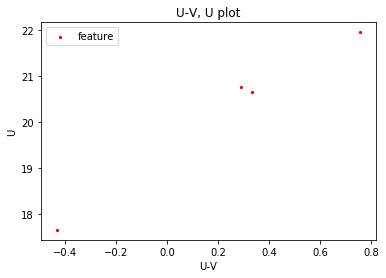

In [262]:
fig = plt.figure()

plot = fig.add_subplot(111)
plot.set_title("Subplot1")
plot.set_xlabel("U-V")
plot.set_ylabel("U")
plot.scatter(tmp1['f336w']-tmp1['f606w'],tmp1['f336w'], s=5, c='r', label="feature")

plt.title("U-V, U plot")
plt.legend(loc=2)
plt.show()

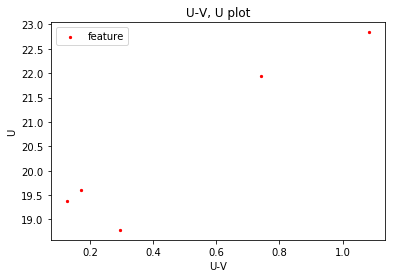

In [263]:
fig = plt.figure()

plot = fig.add_subplot(111)
plot.set_title("Subplot1")
plot.set_xlabel("U-V")
plot.set_ylabel("U")
plot.scatter(tmp2['f336w']-tmp2['f606w'],tmp2['f336w'], s=5, c='r', label="feature")

plt.title("U-V, U plot")
plt.legend(loc=2)
plt.show()

In [231]:
c1 = SkyCoord(ra=float(205.5407)*u.degree, dec=float(28.3798)*u.degree)
for _, row in tmp1.iterrows():
    c2 = SkyCoord(ra=float(row['ra'])*u.degree, dec=float(row['dec'])*u.degree)
    d = c1.separation(c2).to_value(u.radian)
    print(d)

1.6566996844409398e-06
1.8825979032794771e-06
6.935796548504323e-07
1.451877819668808e-06


In [275]:
tmp1

,x,y,f275w,f336w,f438w,f606w,f814w,prob,ra,dec,id
6413,618.1348,239.5454,17.8137,17.6522,18.6494,18.0839,17.3724,96.9,205.540715,28.379894,R0006439
121546,613.3892,238.7969,21.4064,20.6572,21.0700,20.3243,19.7642,99.3,205.540774,28.379886,R0121633
121551,622.1646,233.1406,21.6427,20.7703,21.0578,20.4809,19.8385,92.6,205.540664,28.379824,R0121638
121553,626.7573,229.5815,23.1155,21.9520,22.0853,21.1975,20.5604,97.7,205.540607,28.379785,R0121640


In [232]:
c1 = SkyCoord(ra=float(205.5729)*u.degree, dec=float(28.359)*u.degree)
for _, row in tmp2.iterrows():
    c2 = SkyCoord(ra=float(row['ra'])*u.degree, dec=float(row['dec'])*u.degree)
    d = c1.separation(c2).to_value(u.radian)
    print(d)

7.511707129159066e-06
4.914784047373651e-07
6.2923814253720515e-06
7.696104307429348e-06
6.513450341760507e-06


In [265]:
tmp2

,x,y,f275w,f336w,f438w,f606w,f814w,prob,ra,dec,id
815,-1995.6553,-1641.9351,19.3985,18.7910,19.0492,18.4969,17.9799,95.1,205.573309,28.359236,R0000821
33471,-1960.2625,-1663.4512,22.5010,21.9486,21.8407,21.2065,20.5149,97.4,205.572868,28.359000,R0033520
33472,-1948.2634,-1692.9072,20.2157,19.5943,20.0529,19.4233,18.9433,96.4,205.572718,28.358677,R0033521
33473,-1927.6006,-1644.2615,19.9340,19.3706,19.7683,19.2455,18.7627,96.7,205.572460,28.359211,R0033522
33539,-1995.8274,-1671.7722,-99.9999,22.8340,22.8769,21.7496,20.9065,97.6,205.573311,28.358908,R0033588


# In the end, we chose the star closed to the corresponding X ray sources.